# Ödev

Ödevde Naive Bayes algoritması kullanılarak 3 adet model geliştirilecektir. Ödevin amacı; Naive Bayes'in teorik alt yapısını anlamak ve bununla ilgili uygulama yapmaktır. Ödevin teorik kısmı GitHub readme.md içerisinde açıklanacaktır. IMRAD (Giriş (Özet), Metot, Sonuçlar ve Yorum) formatı kullanılabilir. Algoritmanın teorik yapısı ve kullanılan hiper parametrelerin çalışma prensibi anlatılmalıdır. Repository'nin Readme.md dosyası okunarak çalışma tekrarlanabilir olmalıdır.

## Veri Seti

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv").copy()#okuma yapma

In [3]:
df.head()#verinin başına bakıyor default olarak 5 tane gösteriyor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Veri setini pandas ve matplotlib kullanarak daha ayrıntılı analiz edebilir. Bunları yorumlayabiliriz. İsterseniz bu veri seti üzerinde de oynamalar yapabilirsiniz.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['Outcome'], axis = 1)
y = df["Outcome"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

## Model (Varsayılan Hiperparametreler İle Eğitim)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
gnb = GaussianNB()#obje oluşturma

In [16]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [21]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

0.734375
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



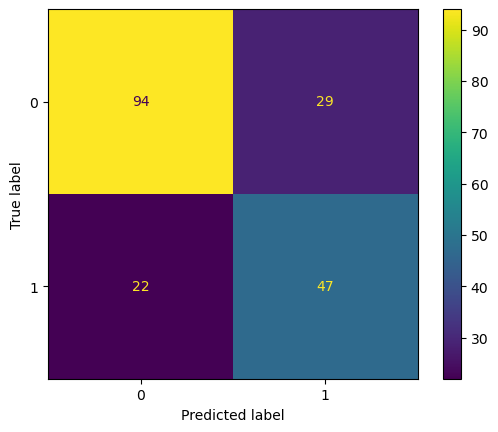

In [22]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
#plt.show()

## Model Tuning (GridSearch, RandomSearch, Bayesian Optimization)

Bu yöntemlerden birini(GridSearch ödev için yeterlidir.) ya da birden fazlasını kullanarak model tuning yapabilir, yeni hiperparametre seti ile model sonuçları bulabiliriz.

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1.4276184122748596e-06}

In [45]:
param_rand = {
    'var_smoothing': np.linspace(1e-5, 1e-20, 1500)
}

search = RandomizedSearchCV(gnb, param_rand,n_iter = 500, scoring = 'accuracy', n_jobs = -1, random_state= 101)
search.fit(X_train, y_train)
search.best_params_

{'var_smoothing': 1.4276184122748596e-06}

In [46]:
gnb = search.best_estimator_
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

0.734375
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



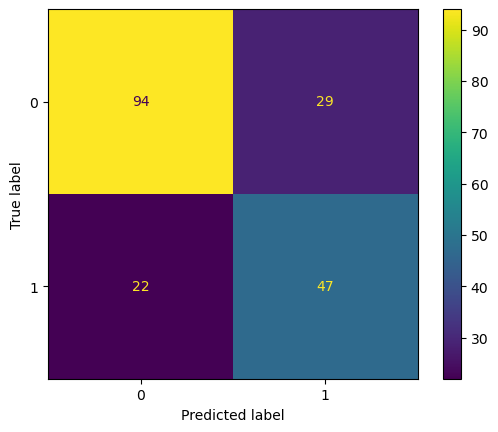

In [47]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
#plt.show()

## Data Manipulation

Veri üzerinde değişiklik yaparak yeni veri seti elde edebilir ve modeli bu veri setinde eğitebiliriz. Örneğin; Normalizasyon (min-max, z-score), feature selection ya da feature engineering. Ödev için normalizasyon yeterlidir.

0.796875
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       123
           1       0.79      0.59      0.68        69

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.80      0.79       192



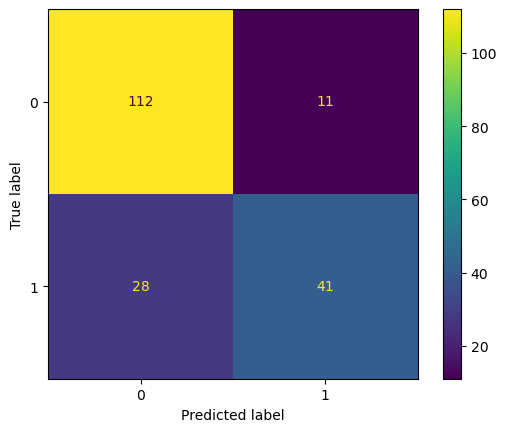

In [48]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=2, output_distribution='normal')

X_train_scaled = qt.fit_transform(X_train)
X_test_scaled = qt.transform(X_test)

gnb.fit(X_train_scaled, y_train)
y_pred_scaled = gnb.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_scaled)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()


...